<a href="https://colab.research.google.com/github/BenRyan-8/DataAcquisition_CA/blob/main/Artworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dataset from metmuseums github

In [60]:
!git lfs clone https://github.com/metmuseum/openaccess

          with new flags from 'git clone'

'git clone' has been updated in upstream Git to have comparable
speeds to 'git lfs clone'.
fatal: destination path 'openaccess' already exists and is not an empty directory.
Error(s) during clone:
git clone failed: exit status 128


In [61]:
%cd

/root


In [62]:
import pandas as pd

met = pd.read_csv('/content/openaccess/MetObjects.csv', low_memory=False)


In [63]:
met.shape

(484956, 54)

In [64]:
met.columns.tolist()

['Object Number',
 'Is Highlight',
 'Is Timeline Work',
 'Is Public Domain',
 'Object ID',
 'Gallery Number',
 'Department',
 'AccessionYear',
 'Object Name',
 'Title',
 'Culture',
 'Period',
 'Dynasty',
 'Reign',
 'Portfolio',
 'Constituent ID',
 'Artist Role',
 'Artist Prefix',
 'Artist Display Name',
 'Artist Display Bio',
 'Artist Suffix',
 'Artist Alpha Sort',
 'Artist Nationality',
 'Artist Begin Date',
 'Artist End Date',
 'Artist Gender',
 'Artist ULAN URL',
 'Artist Wikidata URL',
 'Object Date',
 'Object Begin Date',
 'Object End Date',
 'Medium',
 'Dimensions',
 'Credit Line',
 'Geography Type',
 'City',
 'State',
 'County',
 'Country',
 'Region',
 'Subregion',
 'Locale',
 'Locus',
 'Excavation',
 'River',
 'Classification',
 'Rights and Reproduction',
 'Link Resource',
 'Object Wikidata URL',
 'Metadata Date',
 'Repository',
 'Tags',
 'Tags AAT URL',
 'Tags Wikidata URL']

Reduce the scope of the project down to European Paintings

In [65]:
met['Department'].unique()

array(['The American Wing', 'European Sculpture and Decorative Arts',
       'Modern and Contemporary Art', 'Arms and Armor', 'Medieval Art',
       'Asian Art', 'Islamic Art', 'Costume Institute',
       'Arts of Africa, Oceania, and the Americas', 'Drawings and Prints',
       'Greek and Roman Art', 'Photographs', 'Ancient Near Eastern Art',
       'Egyptian Art', 'European Paintings', 'Robert Lehman Collection',
       'The Cloisters', 'Musical Instruments', 'The Libraries'],
      dtype=object)

In [66]:
met = met[met['Department']== 'European Paintings']
met.reset_index(drop=True, inplace=True)

met['Department'].unique()

array(['European Paintings'], dtype=object)

Check which columns are not being used

In [67]:
empty_cols = met.columns[met.isna().all()].tolist()
print(empty_cols)

['Culture', 'Period', 'Dynasty', 'Reign', 'Portfolio', 'Geography Type', 'City', 'State', 'County', 'Country', 'Region', 'Subregion', 'Locale', 'Locus', 'Excavation', 'River', 'Metadata Date']


In [68]:
met.drop(columns=empty_cols, inplace=True)
met.columns[met.isna().all()].tolist()


[]

In [69]:
met.columns.to_list()

['Object Number',
 'Is Highlight',
 'Is Timeline Work',
 'Is Public Domain',
 'Object ID',
 'Gallery Number',
 'Department',
 'AccessionYear',
 'Object Name',
 'Title',
 'Constituent ID',
 'Artist Role',
 'Artist Prefix',
 'Artist Display Name',
 'Artist Display Bio',
 'Artist Suffix',
 'Artist Alpha Sort',
 'Artist Nationality',
 'Artist Begin Date',
 'Artist End Date',
 'Artist Gender',
 'Artist ULAN URL',
 'Artist Wikidata URL',
 'Object Date',
 'Object Begin Date',
 'Object End Date',
 'Medium',
 'Dimensions',
 'Credit Line',
 'Classification',
 'Rights and Reproduction',
 'Link Resource',
 'Object Wikidata URL',
 'Repository',
 'Tags',
 'Tags AAT URL',
 'Tags Wikidata URL']

Columns with information that is not deemed useful or contains mainly missing values in this section of the data

In [70]:
columns_to_be_dropped = [
    'Is Highlight',
    'Is Timeline Work',
    'Is Public Domain',
    'Rights and Reproduction',
    'Artist ULAN URL',
    'Artist Wikidata URL',
    'Tags AAT URL',
    'Link Resource',
    'Repository',
    'Object Wikidata URL',
    'Tags Wikidata URL']

met.drop(columns = columns_to_be_dropped, inplace = True)

In [71]:
met.head()

,Object Number,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,Constituent ID,Artist Role,Artist Prefix,...,Artist End Date,Artist Gender,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Classification,Tags
0,13.130,435570,NaN,European Paintings,1913,"Painting, miniature",A Ship in a Stormy Sea,10729,Artist,,...,1900,NaN,1892,1837,1900,Card,1 x 2 in. (26 x 53 mm),"Gift of Isabel F. Hapgood, 1913",Miniatures,Seas|Storms|Ships
1,76.10,435572,NaN,European Paintings,1876,"Painting, part of an altarpiece",Saint Giles with Christ Triumphant over Satan ...,10730,Artist,,...,1447,NaN,ca. 1408,1403,1413,"Tempera on wood, gold ground",Overall 59 5/8 x 39 1/2 in. (151.4 x 100.3 cm)...,"Gift of J. Bruyn Andrews, 1876",Paintings,Apostles|Saints|Christ
2,1985.5,435573,NaN,European Paintings,1985,Painting,Flora and Zephyr,16159,Artist,,...,1752,NaN,1730s,1730,1739,Oil on canvas,84 x 58 in. (213.4 x 147.3 cm),"Purchase, Rudolph and Lentilhon G. von Fluegge...",Paintings,Goddess|Putti|Flowers|Landscapes
3,12.6,435574,NaN,European Paintings,1912,"Painting, predella panel",The Crucifixion,16601,Artist,,...,1428,NaN,NaN,1389,1428,"Tempera on wood, gold ground",20 3/4 x 38 1/2 in. (52.7 x 97.8 cm),"Rogers Fund, 1912",Paintings,Soldiers|Men|Crucifixion|Horses|Mountains|Ange...
4,42.53.2,435575,NaN,European Paintings,1942,"Painting, miniature","Jérôme Bonaparte (1784–1860), King of Westphalia",10864,Artist,,...,1808,NaN,NaN,1803,1813,Ivory,2 3/8 x 1 7/8 in. (60 x 48 mm),"Gift of Helen O. Brice, 1942",Miniatures,Kings|Men|Portraits


In [72]:
#from google.colab import files

#met.to_csv('cleanedMet.csv', index=False)

#files.download('cleanedMet.csv')

fields to add:

* metObjectURL
* image_url
* on_view (True/False) "potentially on_view_location"
* overview_text

(
* provenance_text
* exhibition history
* inscriptions

)


In [73]:
BASE = "https://www.metmuseum.org/art/collection/search/"
met['MetObjectURL'] = BASE + met['Object ID'].astype(str)


In [74]:
met['MetObjectURL'].iloc[5]

'https://www.metmuseum.org/art/collection/search/435576'

In [75]:
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd
import time
from tqdm import tqdm


def scrape_met_objects(url_series, delay=0.0, verbose=True):

    image_urls = []
    on_views = []
    overview_texts = []

    for url in tqdm(url_series, desc="Scraping MET pages"):

        try:
            # Build request with browser headers
            request = urllib.request.Request(url)
            request.add_header("User-Agent", "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36")
            opener = urllib.request.build_opener()
            response = opener.open(request)

            html = response.read().decode("utf-8", errors="replace")

            soup = BeautifulSoup(html, "lxml")

            # 1. IMAGE URL
            image_tag = soup.find("meta", {"property": "og:image"})
            image_urls.append(image_tag.get("content") if image_tag else None)

            # 2. ON VIEW STATUS
            text = soup.get_text(" ", strip=True)

            if "Not on view" in text:
                on_views.append(False)
            elif "On view at" in text:
                on_views.append(True)
            else:
                on_views.append(None)

            # 3. OVERVIEW TEXT
            overview_div = soup.select_one("div[class*='object-overview_label']")
            overview_texts.append(overview_div.get_text(" ", strip=True) if overview_div else None)

        except Exception as e:
            # Fail gracefully
            image_urls.append(None)
            on_views.append(None)
            overview_texts.append(None)

        time.sleep(delay)

    return pd.DataFrame({
        "MetObjectURL": url_series,
        "image_url": image_urls,
        "on_view": on_views,
        "overview_text": overview_texts
    })


In [76]:
scraped = scrape_met_objects(met['MetObjectURL'][:100])


Scraping MET pages: 100%|██████████| 100/100 [00:17<00:00,  5.73it/s]


In [77]:
met=met.merge(scraped, on='MetObjectURL', how='left')

In [78]:
met.head()

,Object Number,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,Constituent ID,Artist Role,Artist Prefix,...,Object End Date,Medium,Dimensions,Credit Line,Classification,Tags,MetObjectURL,image_url,on_view,overview_text
0,13.130,435570,NaN,European Paintings,1913,"Painting, miniature",A Ship in a Stormy Sea,10729,Artist,,...,1900,Card,1 x 2 in. (26 x 53 mm),"Gift of Isabel F. Hapgood, 1913",Miniatures,Seas|Storms|Ships,https://www.metmuseum.org/art/collection/searc...,https://collectionapi.metmuseum.org/api/collec...,False,Aivazovsky was a celebrated painter of seascap...
1,76.10,435572,NaN,European Paintings,1876,"Painting, part of an altarpiece",Saint Giles with Christ Triumphant over Satan ...,10730,Artist,,...,1413,"Tempera on wood, gold ground",Overall 59 5/8 x 39 1/2 in. (151.4 x 100.3 cm)...,"Gift of J. Bruyn Andrews, 1876",Paintings,Apostles|Saints|Christ,https://www.metmuseum.org/art/collection/searc...,https://collectionapi.metmuseum.org/api/collec...,False,"These panels, from an altarpiece for the Valen..."
2,1985.5,435573,NaN,European Paintings,1985,Painting,Flora and Zephyr,16159,Artist,,...,1739,Oil on canvas,84 x 58 in. (213.4 x 147.3 cm),"Purchase, Rudolph and Lentilhon G. von Fluegge...",Paintings,Goddess|Putti|Flowers|Landscapes,https://www.metmuseum.org/art/collection/searc...,https://collectionapi.metmuseum.org/api/collec...,False,The composition celebrates the end of winter t...
3,12.6,435574,NaN,European Paintings,1912,"Painting, predella panel",The Crucifixion,16601,Artist,,...,1428,"Tempera on wood, gold ground",20 3/4 x 38 1/2 in. (52.7 x 97.8 cm),"Rogers Fund, 1912",Paintings,Soldiers|Men|Crucifixion|Horses|Mountains|Ange...,https://www.metmuseum.org/art/collection/searc...,https://collectionapi.metmuseum.org/api/collec...,False,
4,42.53.2,435575,NaN,European Paintings,1942,"Painting, miniature","Jérôme Bonaparte (1784–1860), King of Westphalia",10864,Artist,,...,1813,Ivory,2 3/8 x 1 7/8 in. (60 x 48 mm),"Gift of Helen O. Brice, 1942",Miniatures,Kings|Men|Portraits,https://www.metmuseum.org/art/collection/searc...,https://collectionapi.metmuseum.org/api/collec...,False,


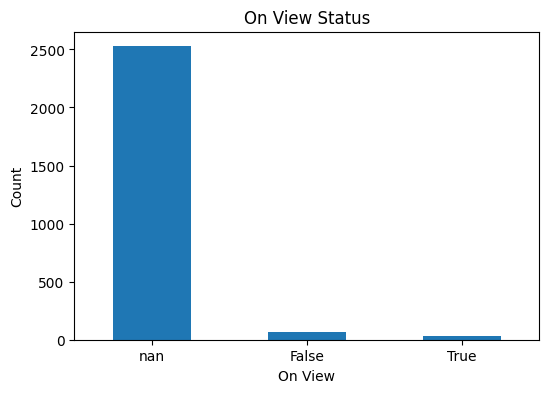

In [80]:
import matplotlib.pyplot as plt

counts = met['on_view'].value_counts(dropna=False)

plt.figure(figsize=(6,4))
counts.plot(kind='bar')
plt.title("On View Status")
plt.xlabel("On View")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


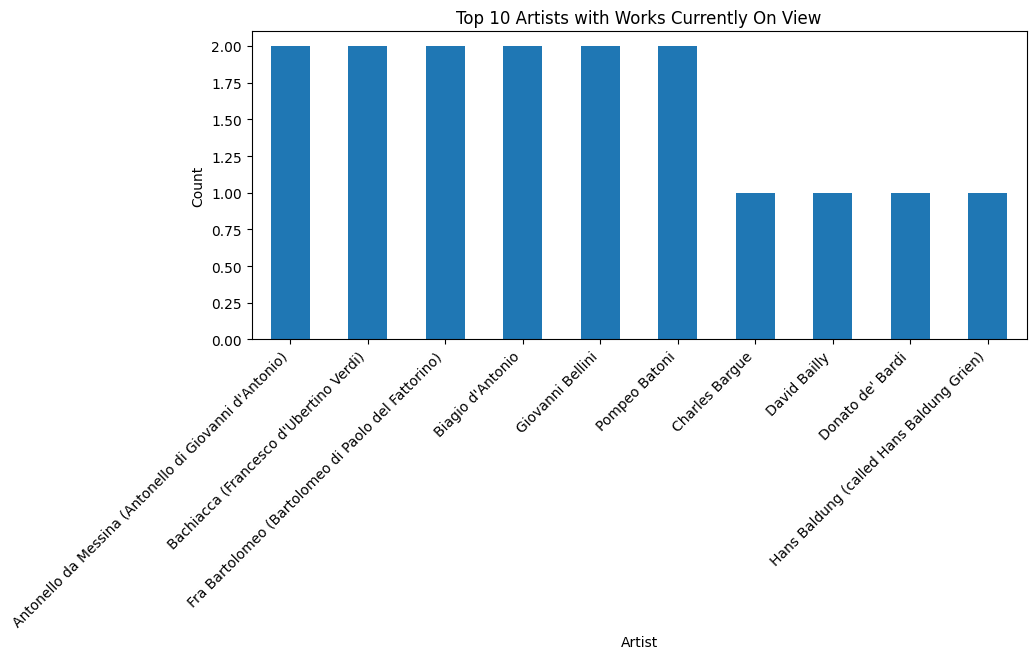

In [82]:
top_artists = (
    met[met['on_view'] == True]['Artist Display Name']
    .value_counts()
    .head(10)
)

plt.figure(figsize=(10,4))
top_artists.plot(kind='bar')
plt.title("Top 10 Artists with Works Currently On View")
plt.xlabel("Artist")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.show()


image URL

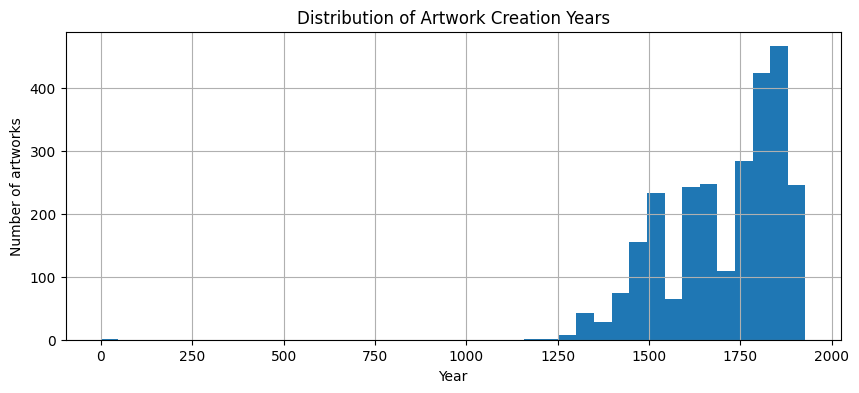

In [83]:
plt.figure(figsize=(10,4))
met['Object Begin Date'].dropna().hist(bins=40)
plt.title("Distribution of Artwork Creation Years")
plt.xlabel("Year")
plt.ylabel("Number of artworks")
plt.show()


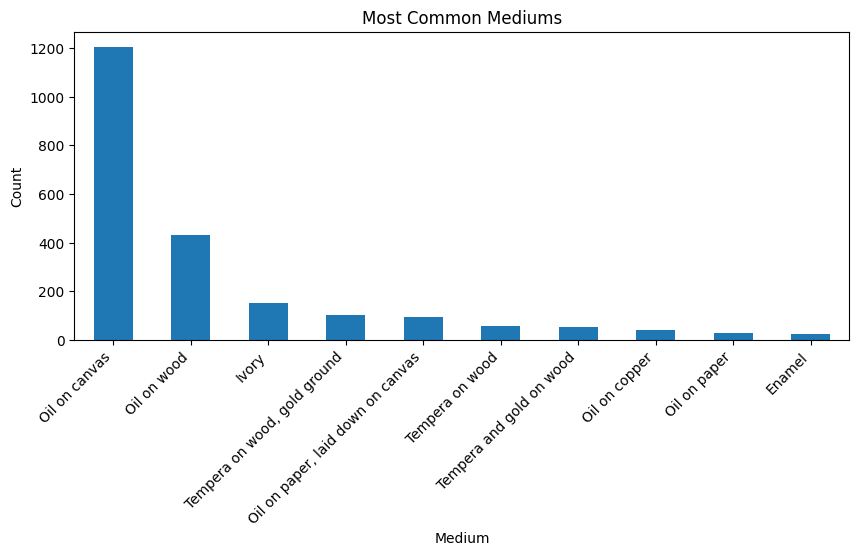

In [84]:
plt.figure(figsize=(10,4))
met['Medium'].value_counts().head(10).plot(kind='bar')
plt.title("Most Common Mediums")
plt.xlabel("Medium")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.show()


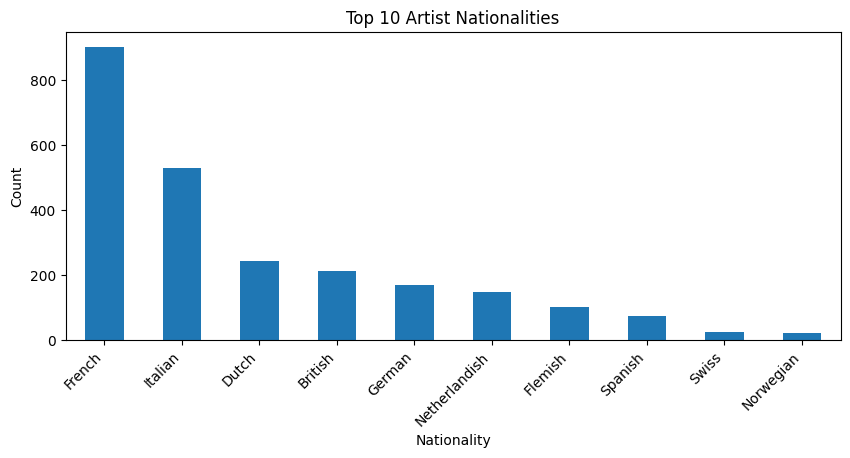

In [85]:
plt.figure(figsize=(10,4))
met['Artist Nationality'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Artist Nationalities")
plt.xlabel("Nationality")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.show()


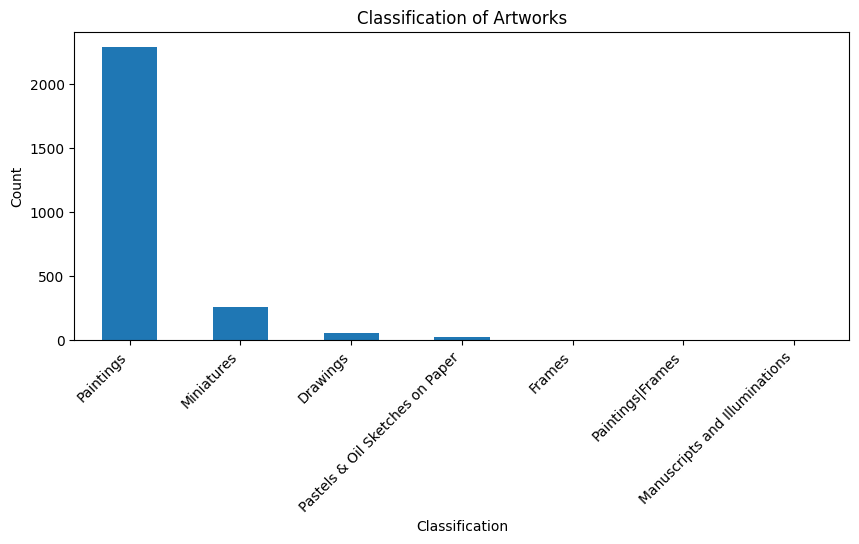

In [86]:
plt.figure(figsize=(10,4))
met['Classification'].value_counts().head(10).plot(kind='bar')
plt.title("Classification of Artworks")
plt.xlabel("Classification")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.show()


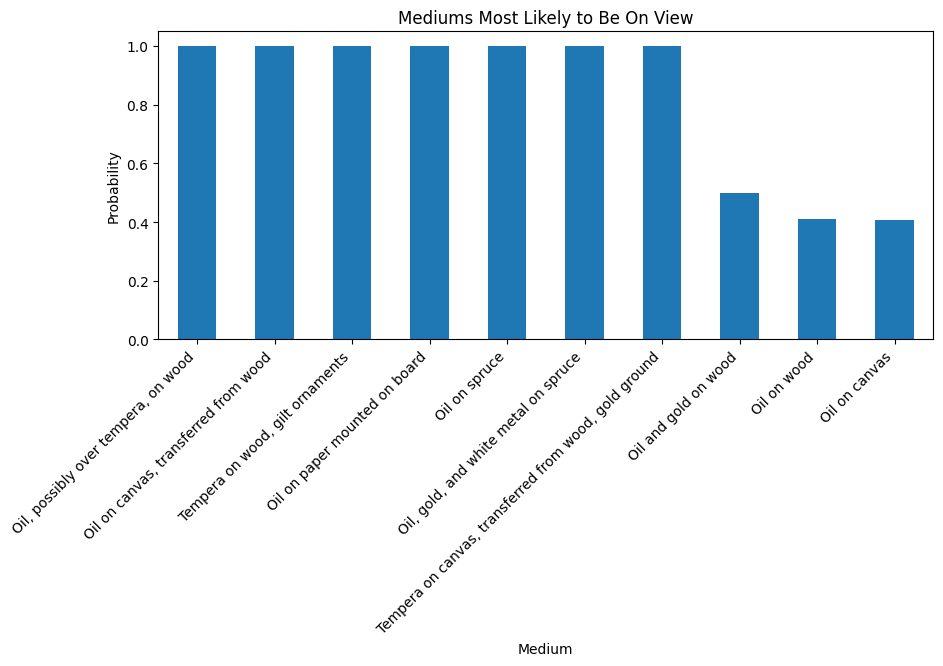

In [87]:
on_view_by_medium = (
    met.groupby('Medium')['on_view']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,4))
on_view_by_medium.plot(kind='bar')
plt.title("Mediums Most Likely to Be On View")
plt.xlabel("Medium")
plt.ylabel("Probability")
plt.xticks(rotation=45, ha='right')
plt.show()


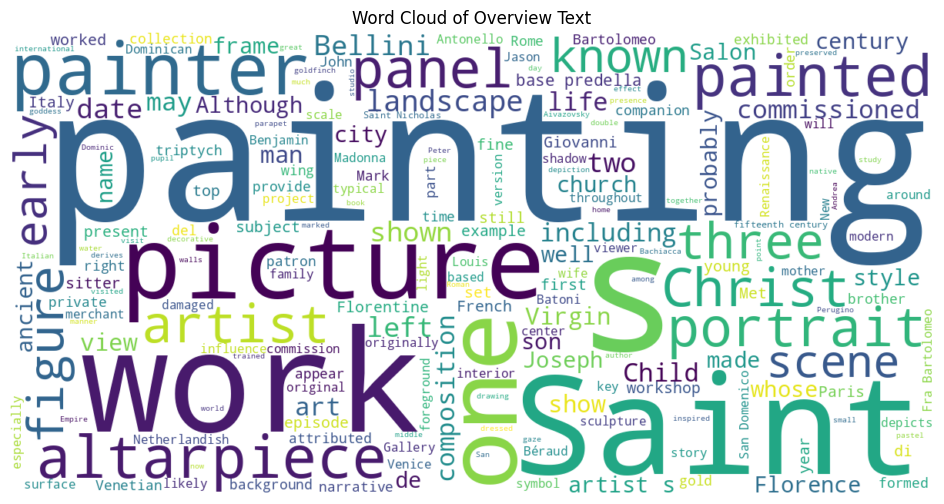

In [89]:
from wordcloud import WordCloud

text = " ".join(met['overview_text'].dropna())

wordcloud = WordCloud(width=1200, height=600, background_color='white').generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Overview Text")
plt.show()


On view?

Overview text